In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("C:/Users/shirl/OneDrive/Desktop/python/python projects/bilibili.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99520 entries, 0 to 99519
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   分区        99520 non-null  object 
 1   author    99520 non-null  object 
 2   coins     99519 non-null  float64
 3   danmu     99519 non-null  float64
 4   favorite  99519 non-null  float64
 5   likes     99519 non-null  float64
 6   reply     99519 non-null  float64
 7   share     99519 non-null  float64
 8   view      99519 non-null  float64
 9   title     99520 non-null  object 
 10  date      99520 non-null  object 
dtypes: float64(7), object(4)
memory usage: 8.4+ MB


In [ ]:
# DATA CLEANING

In [6]:
df_null = df.isnull().sum()

In [7]:
df_null

分区          0
author      0
coins       1
danmu       1
favorite    1
likes       1
reply       1
share       1
view        1
title       0
date        0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99519 entries, 0 to 99519
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   分区        99519 non-null  object 
 1   author    99519 non-null  object 
 2   coins     99519 non-null  float64
 3   danmu     99519 non-null  float64
 4   favorite  99519 non-null  float64
 5   likes     99519 non-null  float64
 6   reply     99519 non-null  float64
 7   share     99519 non-null  float64
 8   view      99519 non-null  float64
 9   title     99519 non-null  object 
 10  date      99519 non-null  object 
dtypes: float64(7), object(4)
memory usage: 9.1+ MB


In [10]:
df = df.drop_duplicates()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99343 entries, 0 to 99518
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   分区        99343 non-null  object 
 1   author    99343 non-null  object 
 2   coins     99343 non-null  float64
 3   danmu     99343 non-null  float64
 4   favorite  99343 non-null  float64
 5   likes     99343 non-null  float64
 6   reply     99343 non-null  float64
 7   share     99343 non-null  float64
 8   view      99343 non-null  float64
 9   title     99343 non-null  object 
 10  date      99343 non-null  object 
dtypes: float64(7), object(4)
memory usage: 9.1+ MB


In [12]:
count = df["title"].groupby(df["author"]).count().reset_index()

In [13]:
df.head()

,分区,author,coins,danmu,favorite,likes,reply,share,view,title,date
0,科学科普,视频传奇,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SpaceX 实现首次商业载人航天发射 4K 超高清 英语原音未加工,05/31/2020 16:59:27
1,科学科普,鹿哥来了-,0.0,0.0,0.0,0.0,0.0,0.0,1.0,【科普】历史上最杠精的人，从逻辑层面让你怀疑人生。,05/31/2020 16:58:37
2,科学科普,迟小到不迟到,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[1080P注释]宇宙尺寸比较 2020,05/31/2020 16:58:36
3,科学科普,Sn1985a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,钱德拉X射线天文台带你观赏强射电源天鹅座A（类星体3C405）,05/31/2020 16:58:31
4,科学科普,I-am-Rex,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[当一切公理化]1+1=2 ！/1+1=2 ？,05/31/2020 16:58:23


In [14]:
# BUILD AN IFL MODEL

In [15]:
# Filtering out bloggers with less than 5 videos and less than 5 bloggers does not represent the quality of bloggers.

In [16]:
count.columns = ['author','times']

In [17]:
com = count[count['times']>=5]

In [18]:
com.columns = ['author','times']

In [42]:
# I(Interaction_rate):Average interaction rate per video

In [ ]:
#  I =（Total impeachments+Total reply)/Total view/Total videos

In [20]:
# Total number of impeachments

In [21]:
danmu=df["danmu"].groupby(df["author"]).sum()

In [22]:
# Total number of reply

In [23]:
reply=df["reply"].groupby(df["author"]).sum()

In [24]:
# Total number of view

In [25]:
view=df["view"].groupby(df["author"]).sum()

In [26]:
# Total number of videos

In [27]:
count=df["title"].groupby(df["author"]).count()

In [28]:
I = (((danmu+reply)/view/count)*100).reset_index()

In [29]:
I.columns=['author','I']

In [30]:
I = pd.merge(com,I,on="author",how="inner")

In [39]:
I.head()

,author,times,I
0,---长征---,5,0.289673
1,-LCspace-,30,0.039600
2,-LEARNING-,66,0.032214
3,-TDA君-,14,0.118872
4,-兔星人-,22,0.181206


In [41]:
# F(Frequence):Average release cycle for each video

In [ ]:
# F = 1/(The date the blogger last posted the video - the date the video was first posted+1)/Total number of videos*100

In [32]:
df["date"]=pd.to_datetime(df["date"])

In [50]:
last = df["date"].groupby(df["author"]).max()
late = df["date"].groupby(df["author"]).min()
time_gap = (last-late).dt.days

In [51]:
F = ((1/(time_gap+1)/count)*100).reset_index()

In [52]:
F.columns=['author','F']

In [53]:
IF = pd.merge(I,F,on="author",how="inner")

In [54]:
IF.head()

,author,times,I,F
0,---长征---,5,0.289673,0.869565
1,-LCspace-,30,0.039600,0.023641
2,-LEARNING-,66,0.032214,0.017825
3,-TDA君-,14,0.118872,0.132275
4,-兔星人-,22,0.181206,0.032938


In [43]:
# L(Like_rate):The average like rate of a video

In [44]:
# L = (Total likes + total coins + total collections) / Total views * 100

In [55]:
likes = df["likes"].groupby(df["author"]).sum()
coins = df["coins"].groupby(df["author"]).sum()
favorite = df["favorite"].groupby(df["author"]).sum()

In [56]:
L = (((likes+coins+favorite)/view)*100).reset_index()

In [57]:
L.columns=['author','L']

In [58]:
IFL = pd.merge(IF,L,on="author",how="inner")

In [59]:
IFL.head()

,author,times,I,F,L
0,---长征---,5,0.289673,0.869565,5.226700
1,-LCspace-,30,0.039600,0.023641,5.575753
2,-LEARNING-,66,0.032214,0.017825,10.094694
3,-TDA君-,14,0.118872,0.132275,18.764483
4,-兔星人-,22,0.181206,0.032938,9.653177


In [60]:
# Modeling processing

In [61]:
IFL["I"]=pd.qcut(IFL["I"],q=5,labels=[1,2,3,4,5])
IFL["F"]=pd.qcut(IFL["F"],q=5,labels=[1,2,3,4,5])
IFL["L"]=pd.qcut(IFL["L"],q=5,labels=[1,2,3,4,5])

In [62]:
def trans(x):
    if x>3:
        return 1
    else:
        return 0

In [63]:
IFL["I"]=IFL["I"].apply(trans)
IFL["F"]=IFL["F"].apply(trans)
IFL["L"]=IFL["L"].apply(trans)
IFL["mark"]=IFL["I"].astype(str)+IFL["F"].astype(str)+IFL["L"].astype(str)

In [64]:
# Create a Zone

In [65]:
def ifltype(x):
    if x == "111":
        return "High-quality bloggers"
    elif x == "101":
        return "High-quality but slow updated bloggers"
    elif x == "011":
        return "High-quality content bloggers"
    elif x == "001":
        return "High-quality content but slow updates bloggers"
    elif x == "110":
        return "Down to earth and active bloggers"
    elif x == "100":
        return "Down to earth bloggers"
    elif x == "010":
        return "Active bloggers"
    else:
        return "A growing bloggers"

In [66]:
IFL["uptype"]=IFL["mark"].apply(ifltype)
IFL_type = IFL["uptype"].groupby(IFL["uptype"]).count()

In [72]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]="Times New Roman"

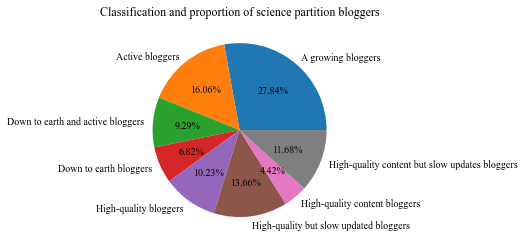

In [74]:
fig = plt.figure()
plt.pie(IFL_type.values/com["author"].count(),labels=IFL_type.index,autopct='%1.2f%%')
plt.title('Classification and proportion of science partition bloggers')
plt.show()

In [78]:
IFL.to_csv("C:/Users/shirl/OneDrive/Desktop/python/python projects/bilibiliIFL.csv",index=False)